In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("train.csv")

In [3]:
data.head()
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print(data.columns.values)
print(" ")
data.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Categorical:Survived, Sex, Embarked
Ordinal:Pclass
Continous:Age,Fare
Discrete:SibSp, Parch
Mixed:ticket

Name can have some errors: quotes, parantheses 
Cabin is not complete at all
Age has NaN

5 int, 5 strings, 2 floats


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So I think we should drop:
ticket %22 duplicates
cabin feature too much blanks
passenger Id
name 
Create:
Age bands
Family: Parch+SibSp
Title from name 

In [6]:
parch = np.array(data['Parch'])
sibsp = np.array(data['SibSp'])
n = parch.shape[0]
fam = np.array([parch[i] + sibsp[i] for i in range(n)])
for i in range(n):
    print(parch[i], sibsp[i], fam[i])
data['Fam'] = fam

0 1 1
0 1 1
0 0 0
0 1 1
0 0 0
0 0 0
0 0 0
1 3 4
2 0 2
0 1 1
1 1 2
0 0 0
0 0 0
5 1 6
0 0 0
0 0 0
1 4 5
0 0 0
0 1 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 3 4
5 1 6
0 0 0
2 3 5
0 0 0
0 0 0
0 0 0
0 1 1
0 0 0
0 0 0
0 1 1
0 1 1
0 0 0
0 0 0
0 2 2
0 1 1
0 1 1
0 1 1
0 0 0
2 1 3
0 0 0
0 0 0
0 1 1
0 0 0
0 2 2
0 1 1
1 4 5
0 0 0
0 1 1
0 1 1
1 0 1
0 0 0
0 0 0
0 0 0
2 1 3
2 5 7
0 0 0
0 0 0
0 1 1
2 3 5
0 0 0
1 1 2
0 0 0
0 0 0
2 4 6
0 2 2
0 0 0
2 5 7
0 0 0
0 1 1
0 0 0
0 0 0
0 0 0
0 0 0
2 0 2
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 3 3
3 1 4
0 0 0
2 3 5
0 0 0
0 0 0
0 0 0
0 1 1
2 1 3
0 0 0
0 0 0
0 0 0
1 0 1
1 0 1
0 1 1
0 0 0
0 0 0
1 0 1
0 0 0
0 2 2
0 0 0
0 0 0
0 0 0
0 0 0
0 1 1
0 0 0
0 1 1
0 0 0
0 1 1
0 0 0
0 0 0
0 0 0
0 1 1
1 0 1
2 4 6
0 2 2
0 0 0
0 1 1
0 0 0
1 0 1
0 1 1
0 0 0
0 0 0
1 1 2
0 0 0
0 0 0
0 0 0
0 1 1
0 1 1
0 0 0
0 0 0
2 0 2
0 1 1
0 0 0
0 0 0
2 0 2
0 0 0
0 1 1
0 0 0
0 0 0
1 1 2
0 0 0
2 2 4
2 0 2
0 0 0
0 0 0
0 1 1
0 0 0
2 0 2
0 0 0
1 0 1
0 0 0
0 0 0
0 0 0
2 8 10
1 0 1
0 0 0
0 0 0
0 0 0
1 4 5
2 0 2
1 0

In [7]:
title = [x.split(',')[1].split('.')[0] for x in data['Name']]
data['Title'] = title

In [8]:
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [9]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


So all of the "the Countess", "Mlle", "Sir", "Ms", "Lady", "Mme" survived. 
We can replace lady countess with Miss stuff so that we will have proper groups?

All of the "Rev", "Don" and "Capt" got eliminated :(

0,74 of all the females survived.

%62.9630  of first class, %47.2826 of second class and %24.2363 of third class survived.

Maybe we can group age and fare and see their ratio as well.




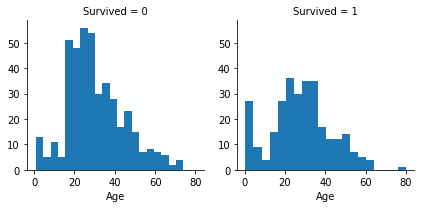

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

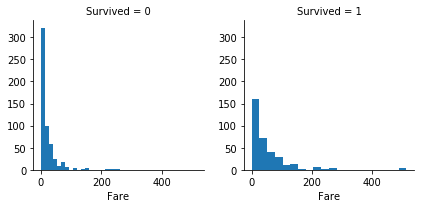

In [12]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

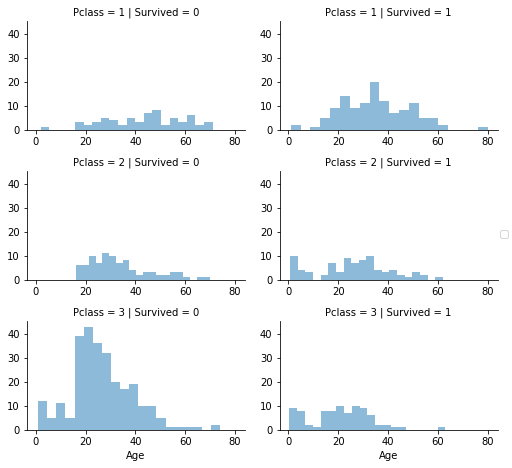

In [13]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


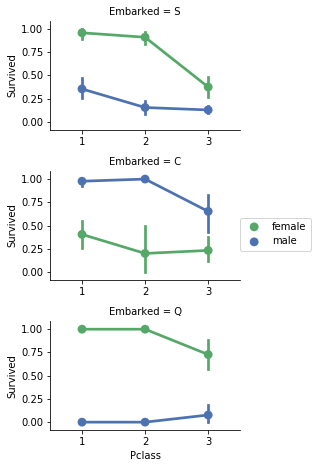

In [14]:
grid = sns.FacetGrid(data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


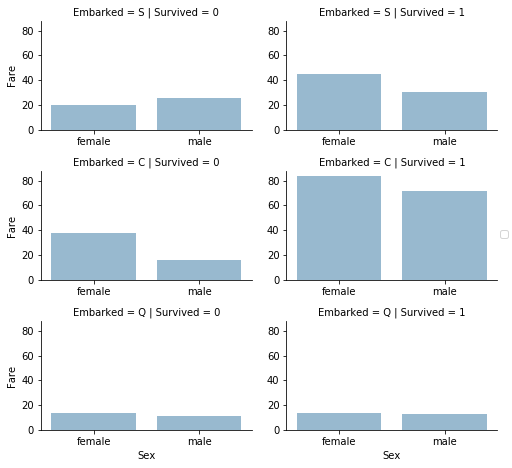

In [15]:
grid = sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [31]:
import math
math.isnan('h')

TypeError: a float is required

In [50]:
import math
import os
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


def process_cabin(dataset):
    # Removes the cabin numbers and only retains general cabin regions
    # Also changes NaN to '-' indicating no cabin known
    cabin_area = []
    for cabin in dataset['Cabin']:
        if type(cabin) == float:
            assert math.isnan(cabin),'Cabins should not be float if not nan'
            cabin_area.append('-')
        else:
            cabin_area.append(cabin[0])
    dataset['Cabin'] = cabin_area
    return dataset

def add_fam_col(dataset):
    # Adds up parch and sibsp column to get a family size count
    parch = np.array(dataset['Parch'])
    sibsp = np.array(dataset['SibSp'])
    n = parch.shape[0]
    fam = np.array([parch[i] + sibsp[i] for i in range(n)])
    for i in range(n):
        print(parch[i], sibsp[i], fam[i])
    dataset['Fam'] = fam
    return dataset
def add_title_col(dataset):
    # Parses name information to retrieve the title of the passenger
    title = [x.split(',')[1].split('.')[0] for x in dataset['Name']]
    dataset['Title'] = title
    return dataset

def preprocess_data(data):
    # Add new features
    data = add_fam_col(data)
    data = add_title_col(data)
    data = process_cabin(data)
    
    # Drop columns that we think won't be important
    data.drop(labels=['Name','Ticket','Embarked','PassengerId'],axis=1, inplace=True)
    return data

def plot_correlation_heatmap(dataset):
    sns.heatmap(dataset.corr(),cmap='seismic')
    plt.show()

In [51]:
import os
os.listdir()

['test.csv',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv',
 'Titanic.ipynb']

In [46]:
data2 = pd.get_dummies(cl_data,columns=['Survived','Pclass','Sex','Cabin','Title'])

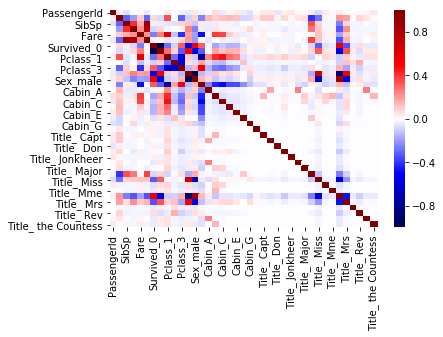